
# Project: Investigate a Dataset - [no show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
<p>Inspiration</p>
What if that possible to predict someone to no-show an appointment? This is analysis for the possibility that a patient who make an appointment at their doctor but did not show This helps to identify the reason for no show if it is related to the 


<h4>Columns</h4>
<ol>
    <li>PatientId:Identification of a patient</li>
    <li>AppointmentID: Identification of each appointment</li>
    <li>GenderMale or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man</li>
    <li>DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.</li>
    <li>DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.</li>
    <li>Age: How old is the patient.</li>
    <li>Neighbourhood: Where the appointment takes place.</li>
    <li> Scholarship: True of False . Observation, this is a broad topic.</li>
    <li>Hipertension: True or False</li>
    <li>Diabetes: True or False</li>
    <li>Alcoholism: True or False</li>
    <li>Handcap: True or False</li>
    <li>SMS_received: 1 or more messages sent to the patient.</li>
    <li>No-show: True or False.</li>

</ol>

### Question(s) for Analysis
##### Q1) who is more likely to not show-up for his appointment
<P> This question will give an indeication if Gender has effect on showing at the doctor
    
##### Q2) Is recieving Sms Reminder affects the show-up?
<P> This question will give an indeication if recieving a reminder affects the rate of showing athte appointment

##### Q3) Is long waiting day affects the show-up?
<P> This question will give an indeication if long waiting tiemaffects the decision to go to the doctor

##### Q4) Is being diabetecs affects the show-up?
<P> This question will give an indeication if having diabetes might affects going to the doctor

##### Q5) Is being alcholoic affects the show-up?
<P> This question will give an indeication if acoholic affects going to the doctor


<a id='wrangling'></a>
## Data Wrangling

### General Properties

###### Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.


In [109]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
base_color = sns.color_palette()[0]
sns.set(rc={'figure.figsize':(8, 8)})
sns.set_style("whitegrid")

%matplotlib inline

In [110]:
# Read the dqata and print the first 5 rows

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [111]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [112]:
# Explore the shape of the dataset
df.shape

(110527, 14)

In [113]:
# Explore the datatypes and the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [114]:
# Explore the statistical properties ofr the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [115]:
# CHeck missing Values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [116]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [117]:
# Check Bias

df[df['Gender']== 'M'].shape[0] / df.shape[0]

0.35002307128574917

<Container object of 2 artists>

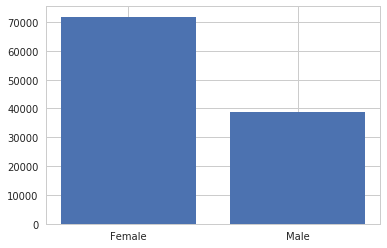

In [118]:
male = df[df.Gender == 'M']
female = df[df.Gender == 'F']
plt.bar(['Male', 'Female'], [len(male), len(female)])

###### Insights
<ol>
    <li> Our data set has no missing values</li>
    <li>Columns has dates are not in the right format</li>
    <li> The IDs in numeric format </li>
    <li>The minimum age registered is -1 and the maximum age is 115 which is somehow how hard to happen</li>
    <li>There are no duplicated COlumns</li>
    <li>Our data is biased toward women --> there are more women than men</li>
    <li>Some data are of type int64 also they are binary object calues</li>
</ol>


### Data Cleaning
 

In [119]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [120]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

###### 1)  Changing Format of date columns

<p>Change the format to datetime and calculate the number of days between the registration and the appointment day.


In [121]:
def new_format(df, col):
    '''
    Take only the day and month and year from the data and also cahnge the data type
    '''
    df[col] = df[col].map(lambda x: x.split('T')[0])
    df[col] = pd.to_datetime(df[col])
    return df[col]

In [122]:
ScheduledDay = new_format(df, 'ScheduledDay').head()
ScheduledDay

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]

In [123]:
AppointmentDay = new_format(df, 'AppointmentDay').head()
AppointmentDay

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [124]:
df['daysdiff'] = df['AppointmentDay'] - df['ScheduledDay']
df['daysdiff'] = df['daysdiff'].map(lambda x: str(x).split(' ')[0])
df['daysdiff'] = df['daysdiff'].astype(int)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
daysdiff          110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 12.6+ MB


###### 2) Drop unimportant columns

In [126]:
def drop(df, col):
    df.drop(col, axis = 1, inplace = True)
    return df
drop(df, ['ScheduledDay','AppointmentDay', 'PatientId', 'AppointmentID'])

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysdiff
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,F,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,F,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,F,19,CONQUISTA,0,0,0,0,0,0,No,2


###### 3) Label Encode the showing column

In [127]:
df['No-show'] = df['No-show'].astype('category')
df['No-show'] = df['No-show'].cat.codes
df['No-show'].head()

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int8

###### 4) Removing rows containing invalid values

In [128]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysdiff
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [129]:
# There is one row where age is -1 years old.> Remove it
df = df[df.Age != -1]

After Inspecting the age range, it is hard to have a popualtion over 110 but as the data is repeated more than once so i will leave this instances without deletion

In [130]:
# Drop the patients whose apporintments were behind the registration dates
df[df.daysdiff < 0]


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysdiff
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,1,-1


In [131]:
df = df[df['daysdiff'] != -6]
df = df[df['daysdiff'] != -1]

In [132]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysdiff
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,10.184345
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [133]:
# Look for correlation betweent the variables
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysdiff
Age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,-0.060320,0.034813
Scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,0.029166,-0.030435
Hipertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,-0.035662,-0.017236
Diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,-0.015158,-0.027200
Alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,-0.000181,-0.038527
Handcap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,-0.006290,-0.019774
SMS_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,0.126502,0.398128
No-show,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.006290,0.126502,1.000000,0.186320
daysdiff,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.019774,0.398128,0.186320,1.000000


<p> From the previous correaltion table, it is obvious that showing up to the appointment is positively correlated to whether the number of days between making the appointment and the date of the appointment also the whether recieving Sms before the appointment or not.
Also the correlation is not great but could be used for further investigation

In [134]:
df1 = df[df['No-show'] == 1] # patient who did not show up for their mappointment

df2 = df[df['No-show'] == 0] # patient who show up for their mappointment


### Q1) who is more likely to not show-up for his appointment

<p> This question assume that maybe one of the gender is giving not much importance for his health as globaly women are more care about their health.

In [135]:
df['No-show'].dtypes

dtype('int8')

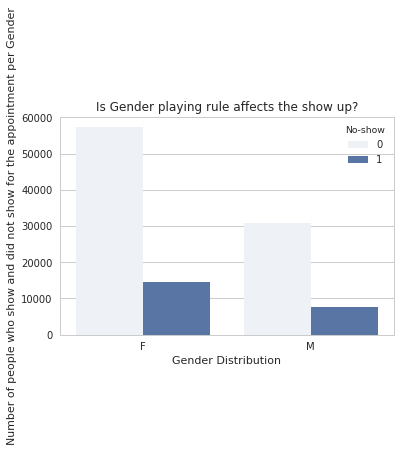

In [136]:
sns.countplot(data=df, x='Gender', hue='No-show', color=base_color)
plt.xlabel('Gender Distribution')
plt.ylabel('Number of people who show and did not show for the appointment per Gender')
plt.title('Is Gender playing rule affects the show up?')
sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("whitegrid")
plt.show();

In [137]:
male = df[df.Gender == 'M']
female = df[df.Gender == 'F']

In [138]:
maleperc = df1[df1.Gender == 'M'].shape[0] / len(male)
maleperc

0.19963810262375598

In [139]:
femaleperc = df1[df1.Gender == 'F'].shape[0] / len(female)
femaleperc

0.2031154295896208

###### From the previous step we could gain insight that although the number of appointments for women is greater than for men, both gender has nearly similar ratio for missing the appointment and that refuse our assumption about may men are less care about their health

### Q2) Is recieving Sms Reminder affects the show-up?

This assumptionreflects the importance about remind the patients aboput their appointments

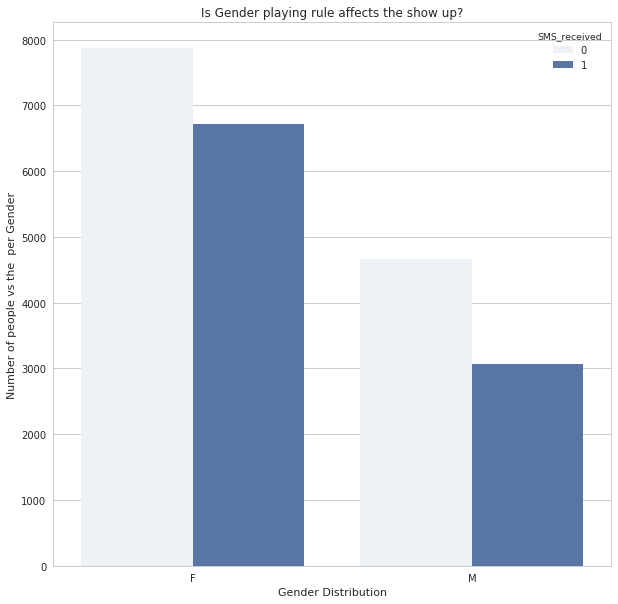

In [140]:
sns.countplot(data=df1, x='Gender', hue='SMS_received', color=base_color)
plt.xlabel('Gender Distribution')
plt.ylabel('Number of people vs the  per Gender')
plt.title('Is Gender playing rule affects the show up?')
plt.show();

In [141]:
df2 = df[df['No-show'] == 1] 

No_show_no_sms = df2[df2.SMS_received == 0].shape[0] / df2.shape[0]
No_show_no_sms

0.561530877476024

In [142]:
No_show_yes_sms = df2[df2.SMS_received == 1].shape[0] / df2.shape[0]
No_show_yes_sms

0.43846912252397596

In [143]:
df3 = df[df['No-show'] == 0] 
show_no_sms = df3[df3.SMS_received == 0].shape[0] / df3.shape[0]
show_no_sms

0.7086625777999479

In [144]:
show_yes_sms = df3[df3.SMS_received == 1].shape[0] / df3.shape[0]
show_yes_sms

0.29133742220005215

<p> From the previous calculation, we can get some insights that being reminded with the appointment did not affect the decision for showing up to the appointment as mnay of the non showers had recieved a reminders.

### Q3) Is long waiting day affects the show-up?


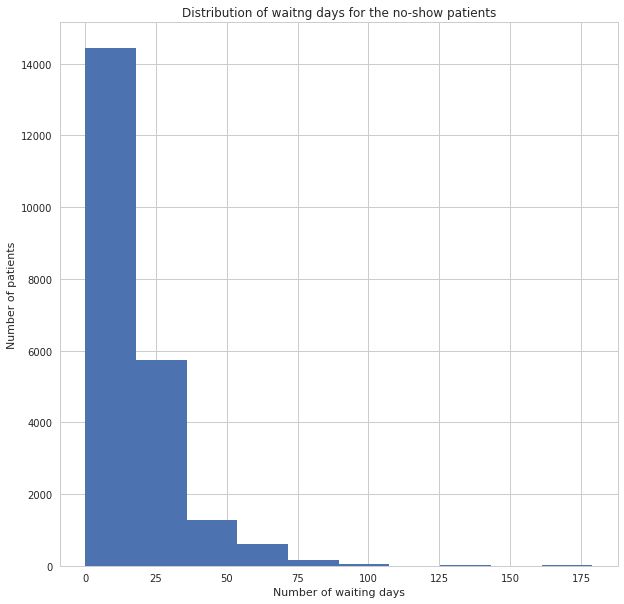

In [145]:
# No show
plt.hist(df1.daysdiff)
plt.xlabel('Number of waiting days')
plt.ylabel('Number of patients')
plt.title('Distribution of waitng days for the no-show patients')
plt.show();

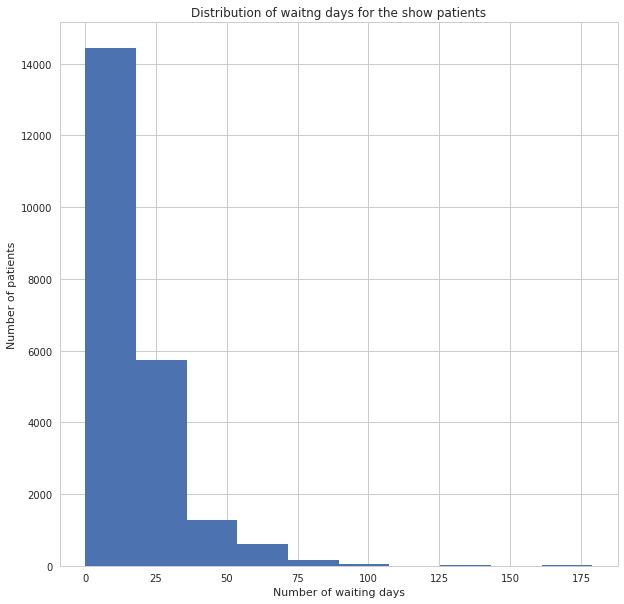

In [146]:
# Show
plt.hist(df2.daysdiff)
plt.xlabel('Number of waiting days')
plt.ylabel('Number of patients')
plt.title('Distribution of waitng days for the show patients')
plt.show();

from the previous visualization, many people decide not to go for the appointment when the waiting time is long, also this is not the main reason for the no-show but it maybe a reason and need more investigation

### Q4) Is being diabetecs affects the show-up?


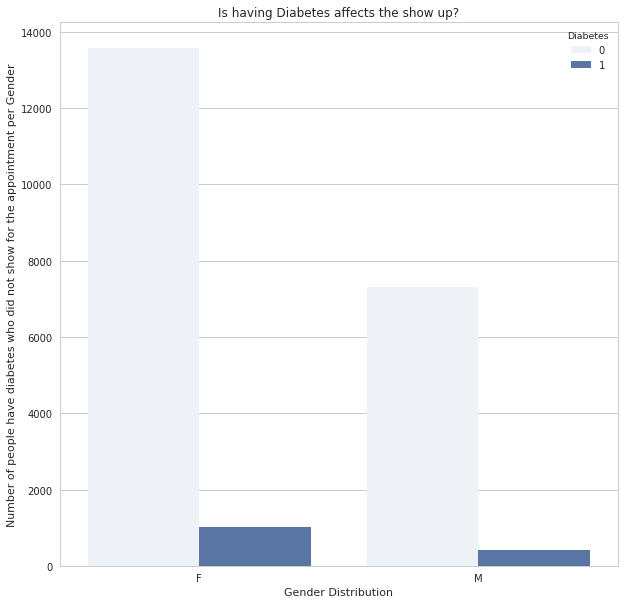

In [147]:
sns.countplot(data=df2, x='Gender', hue='Diabetes', color=base_color)
plt.xlabel('Gender Distribution')
plt.ylabel('Number of people have diabetes who did not show for the appointment per Gender')
plt.title('Is having Diabetes affects the show up?')
plt.show();

In [148]:
df1 = df[df['No-show'] == 1] # patient who did not show up for their mappointment

df2 = df[df['No-show'] == 0] # patient who show up for their mappointment

In [149]:
No_show_no_diab= df1[df1.Diabetes == 0].shape[0] / df1.shape[0]
No_show_no_diab

0.9359146724029757

In [150]:
No_show_diab= df1[df1.Diabetes == 1].shape[0] / df1.shape[0]
No_show_diab

0.06408532759702429

In [151]:
show_diab= df2[df2.Diabetes == 1].shape[0] / df2.shape[0]
show_diab

0.07383767728184838

In [152]:
show_no_diab= df2[df2.Diabetes == 0].shape[0] / df2.shape[0]
show_no_diab

0.9261623227181516

<p> From previous calculation, the percentage of patients who have diabetes and show at their appointments and the patients who are diabetes but did not show for their appointments is not different, so we can get a conclusion that there is no indication that being Diabetes affects the decision to go to the praxis.

### Q5) Is being alcholoic affects the show-up?
###### See if being alcholic affect the showing up at the praxis or not for both Gender

In [95]:
df1 = df[df['No-show'] == 1] # patient who did not show up for their mappointment

df2 = df[df['No-show'] == 0] # patient who show up for their mappointment
df2.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysdiff
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


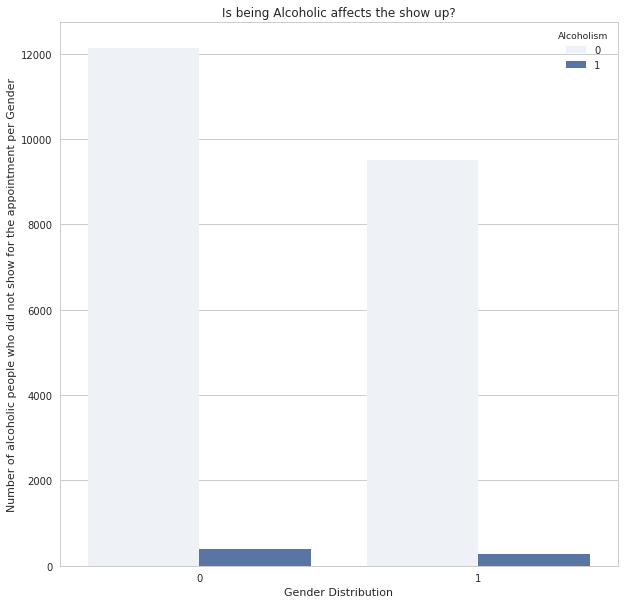

In [156]:
sns.countplot(data=df1, x='Gender', hue='Alcoholism', color=base_color)
plt.xlabel('Gender Distribution')
plt.ylabel('Number of alcoholic people who did not show for the appointment per Gender')
plt.title('Is being Alcoholic affects the show up?')
plt.show();

In [154]:
No_show_no_Alco = df2[df2.Alcoholism == 0].shape[0] / df2.shape[0]
No_show_no_Alco

0.9695829129207433

In [155]:
No_show_Alco = df2[df2.Alcoholism == 1].shape[0] / df2.shape[0]
No_show_Alco

0.03041708707925675

<p> Here Also, the number of alcoholic  patients who did not show for the appointment is around 3  % by which we caould not consider it as a significance for being alcholoism affects going to the praxis.

<a id='conclusions'></a>
## Conclusions
<ol>
    <li>The Gender has no effect on the no-show as around 20% from the applied patient in both gender did not show</li>
    <li>Being reminded with the appointment did not affect the decision for showing up to the appointment as mnay of the non showers had recieved a reminders</li>
    <li>Being alcoholic did not  affects the going to the appointment in both gender</li>
    <li>75% of the no showed patient have around 23 waiting days for the appointments while the same percentage for the showed patients have only 12 waiting days or less which mean this is a great hypothesis to test more</li>
    
</ol>


###### The limitations of your exploration. 

The Exploration is limit m with the data but one important thng is that we can not measure the distance from home to praxis for each patient.. as many patient might become lazy when the distance is long.
Also, i did not explore some of features like being Hipertension or have a scholarship.

the number of features is not big enough to git a real insight about why the no-show from the patient side.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

In [161]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0